# Column Transformation

To obtain a prediction with a better performance, it is needed to evaluate if feature in the model. To this aim, each of them will be explored to see if they have a normal distribution since they will be more meaningful to the model in this way.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
sys.path.append('..')

In [2]:
root = '../data/cars_reg.csv'

df = pd.read_csv(root)

df.head()

,doors,co2_emiss,height,length,max_speed,mixed_cons,weight,tank_vol,acc,price,...,warranty_NO,warranty_YES,dealer_Individual,dealer_Professional,brand_encoded,model_encoded,city_encoded,color_encoded,type_encoded,chassis_encoded
0,2,99,157,270,145,4.3,780,33,13.7,5500,...,0.0,1.0,0.0,1.0,11039.980916,10171.125628,15841.032810,16998.492107,28133.811134,20602.196957
1,3,179,140,426,235,7.6,1373,55,7.2,10900,...,0.0,1.0,0.0,1.0,17051.258362,13160.993789,18049.881613,16998.492107,28133.811134,31238.629315
2,4,109,142,453,222,4.2,1545,42,8.5,36100,...,0.0,1.0,0.0,1.0,23572.093803,23508.383973,18554.493671,21242.844857,28133.811134,31238.629315
3,5,142,162,467,212,5.4,1740,67,8.0,28000,...,0.0,1.0,0.0,1.0,23572.093803,36412.589552,16569.441935,16998.492107,28133.811134,31238.629315
4,2,488,123,446,189,21.0,1546,70,3.9,27990,...,0.0,1.0,0.0,1.0,12506.369048,17773.464491,17306.168324,17415.598758,28133.811134,31238.629315


## Represent curves distribution

In [3]:
X = df.drop('price', axis=1)

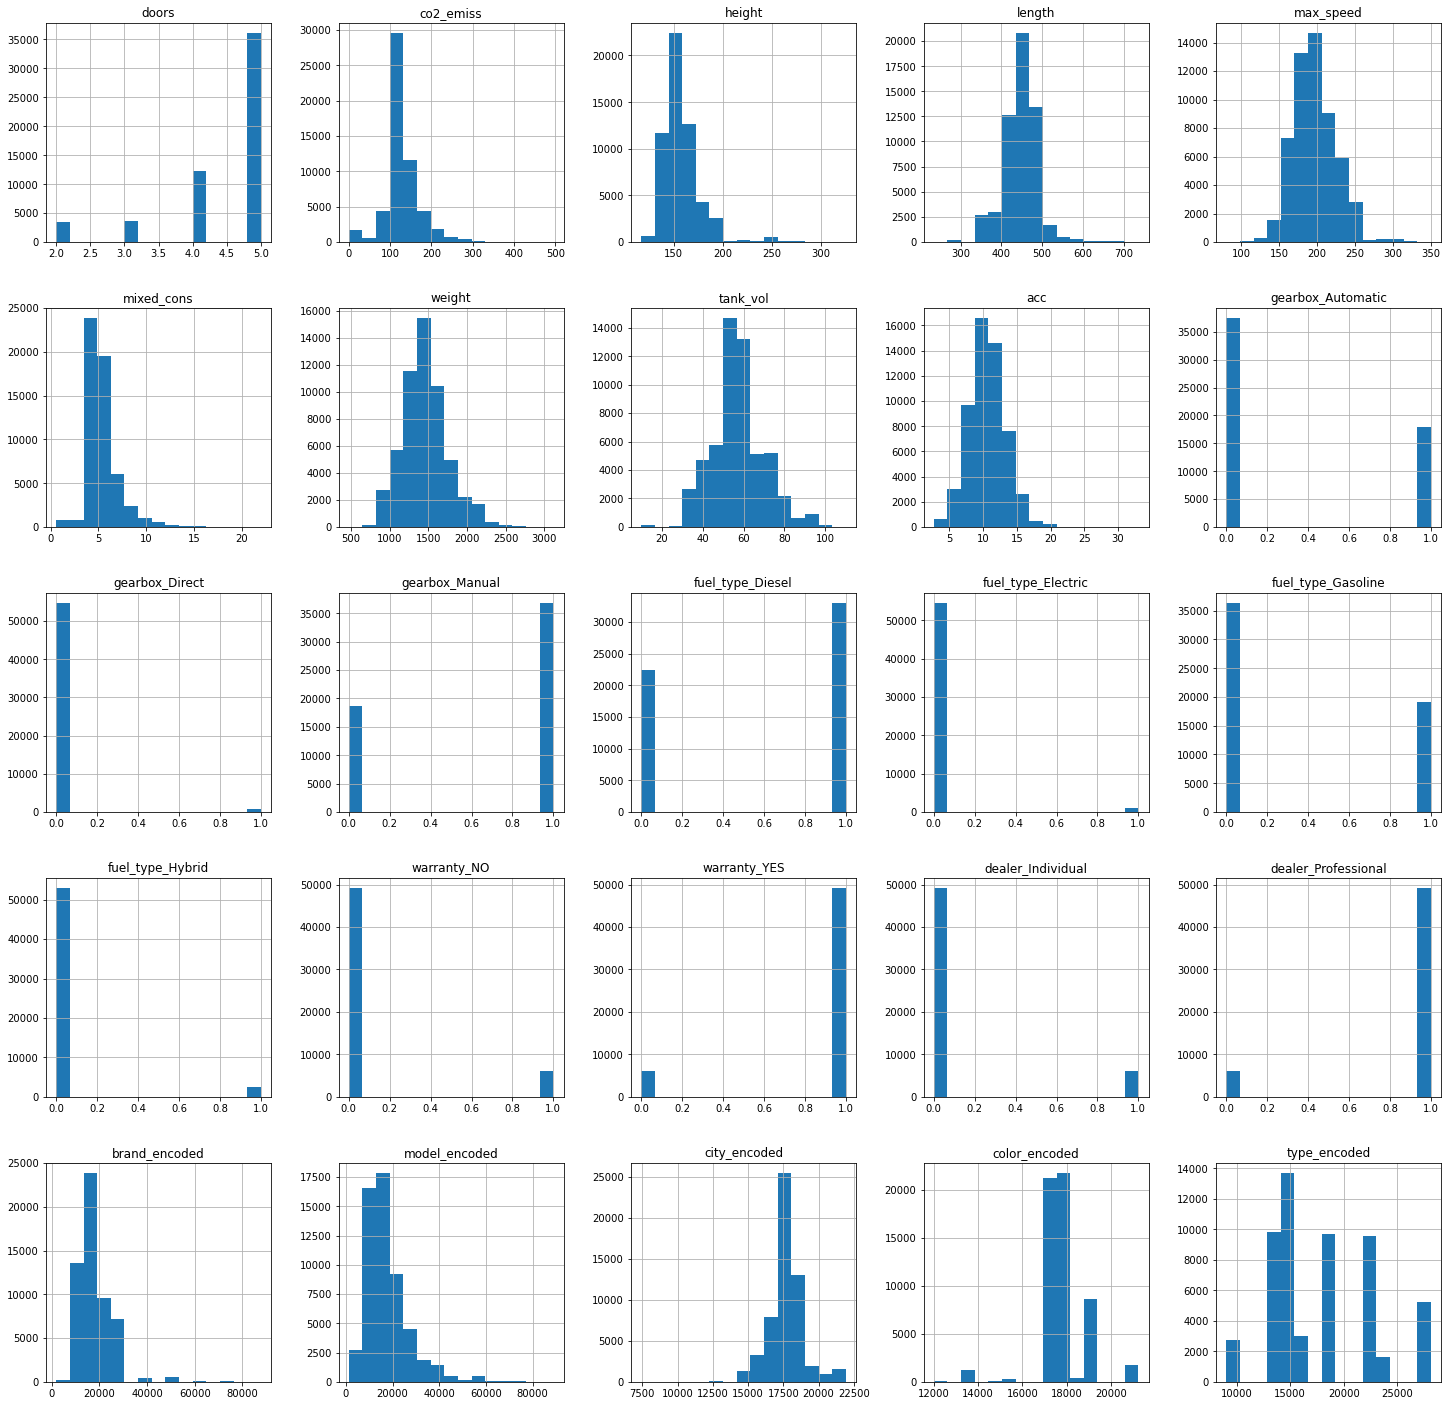

In [4]:
fig, axes = plt.subplots(len(X.columns)//5, 5, figsize=(25, 25))

i = 0
for triaxis in axes:
    for axis in triaxis:
        df.hist(column=X.columns[i], bins=15, ax=axis)
        i += 1

First, we notice that `doors` column is categorical, so it is better to apply a `Binarizer` to this column.

In [5]:
from sklearn.preprocessing import LabelBinarizer

In [6]:
lb = LabelBinarizer()
lb.fit(X['doors'])
doors_trf = lb.transform(X['doors'])

In [7]:
doors_cols = []
for e in X['doors'].unique().tolist():
    col = 'doors_' + str(e)
    doors_cols.append(col)

doors_cols

['doors_2', 'doors_3', 'doors_4', 'doors_5']

In [8]:
ohe_doors = pd.DataFrame(doors_trf, columns=doors_cols)
X = pd.concat([X, ohe_doors], axis=1)
X.head()

,doors,co2_emiss,height,length,max_speed,mixed_cons,weight,tank_vol,acc,gearbox_Automatic,...,brand_encoded,model_encoded,city_encoded,color_encoded,type_encoded,chassis_encoded,doors_2,doors_3,doors_4,doors_5
0,2,99,157,270,145,4.3,780,33,13.7,1.0,...,11039.980916,10171.125628,15841.032810,16998.492107,28133.811134,20602.196957,1,0,0,0
1,3,179,140,426,235,7.6,1373,55,7.2,0.0,...,17051.258362,13160.993789,18049.881613,16998.492107,28133.811134,31238.629315,0,1,0,0
2,4,109,142,453,222,4.2,1545,42,8.5,1.0,...,23572.093803,23508.383973,18554.493671,21242.844857,28133.811134,31238.629315,0,0,1,0
3,5,142,162,467,212,5.4,1740,67,8.0,1.0,...,23572.093803,36412.589552,16569.441935,16998.492107,28133.811134,31238.629315,0,0,0,1
4,2,488,123,446,189,21.0,1546,70,3.9,1.0,...,12506.369048,17773.464491,17306.168324,17415.598758,28133.811134,31238.629315,1,0,0,0


In [9]:
X.drop('doors', axis=1, inplace=True)

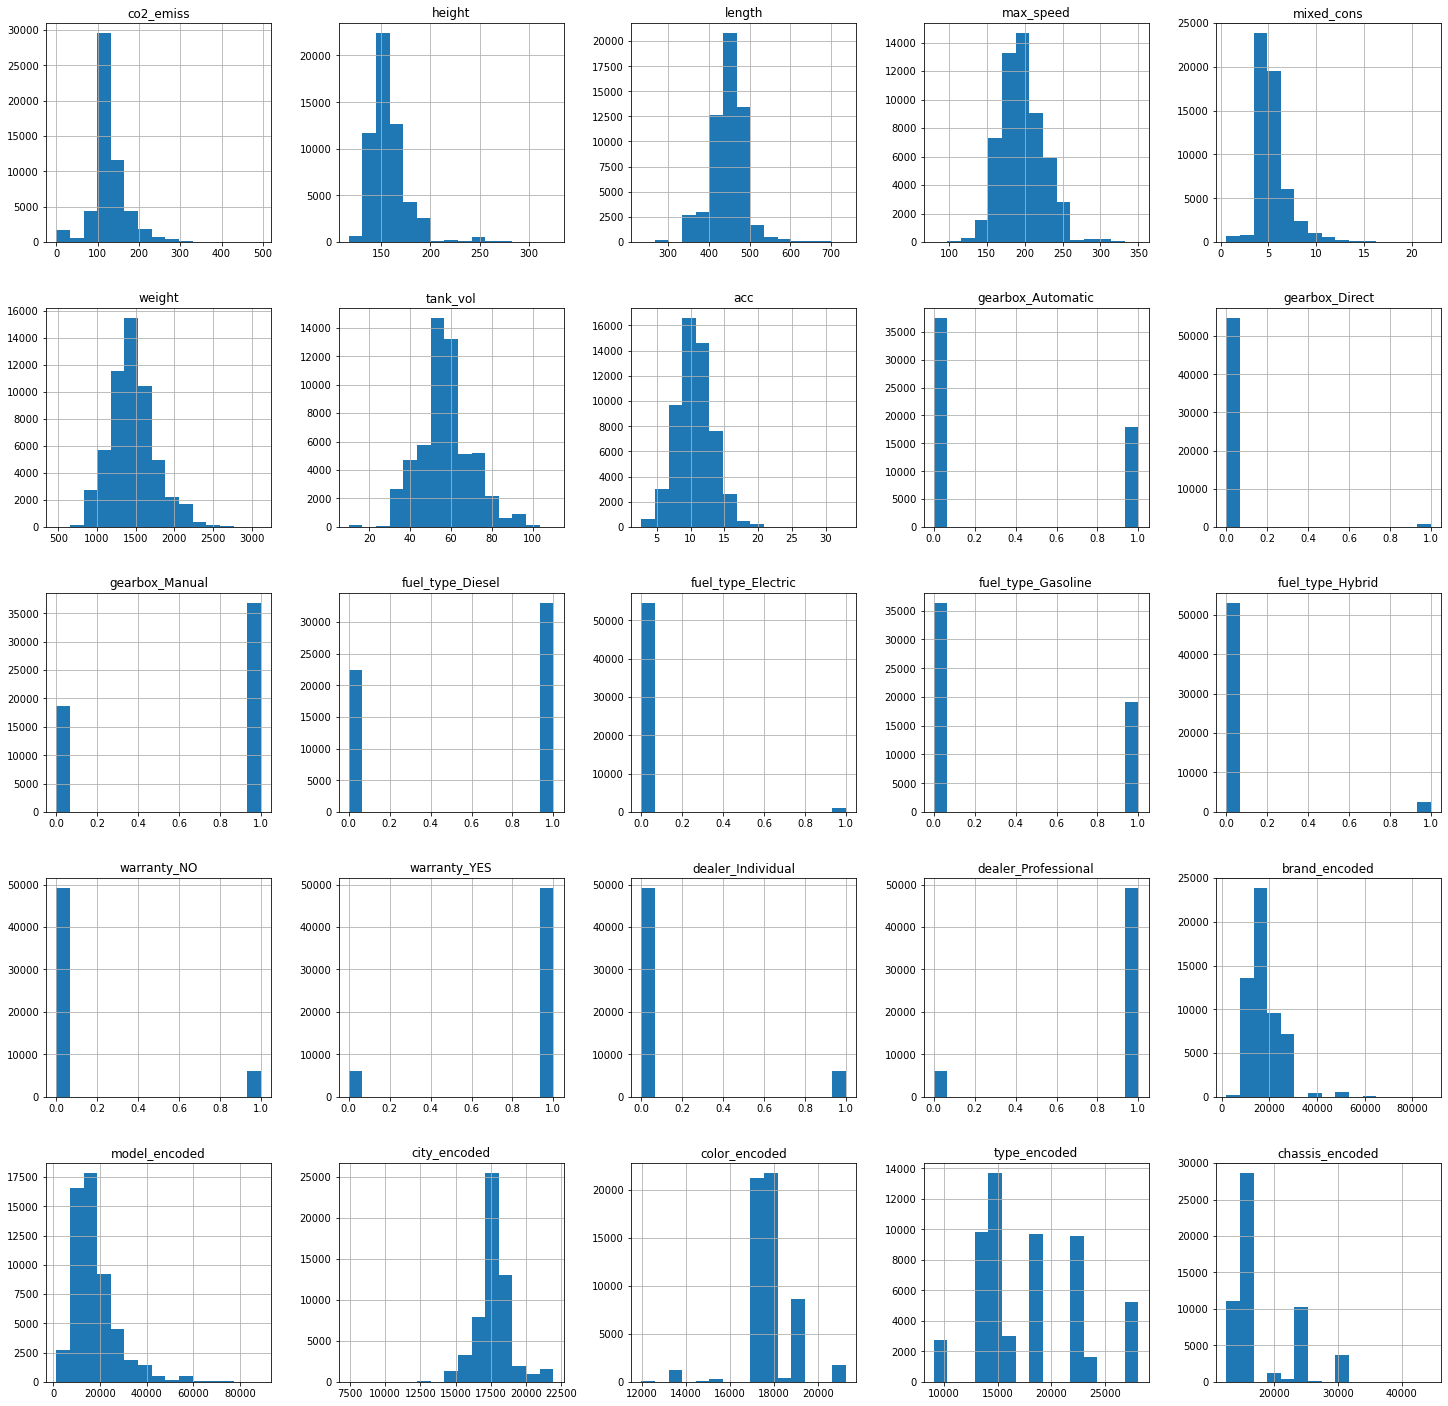

In [11]:
fig, axes = plt.subplots(len(X.columns)//5, 5, figsize=(25, 25))

i = 0
for triaxis in axes:
    for axis in triaxis:
        df.hist(column=X.columns[i], bins=15, ax=axis)
        i += 1

## Power Transformations: Box-Cox and Yeo-Johnson

In [13]:
from sklearn.preprocessing import PowerTransformer, QuantileTransformer

## Standardizing columns: StandardScaler, MinMaxScaler

## PCA: Reduce Dimensionality